In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


#Importing Libraries

In [2]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import cv2
import numpy as np
from glob import glob


In [3]:
ROOT_PATH=r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16"

In [4]:
pwd

'C:\\Users\\Gen. Shakefire\\Desktop\\LANDMINE USING CNN VGG16'

In [5]:
import os 
os.chdir(ROOT_PATH)
os.getcwd()

'C:\\Users\\Gen. Shakefire\\Desktop\\LANDMINE USING CNN VGG16'

In [6]:
train_path=r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16\train"
test_path=r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16\test"
val_path=r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16\validation"

In [7]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr= target_size=(224,224), #cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [8]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr= target_size=(224,224), #cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [9]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr= target_size=(224,224), #cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [10]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

#Resizing all images

In [11]:
IMAGE_SIZE=[224,224]

#Importing VGG16 library and add preprocesing layer in front of the VGG16.
#Here we will se ImageNet weights

In [12]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

include_top= False means that we will cut off the last dense layer of pre-trained model of VGG16 as it was trained for 1000 output categories of imagenet whereas we only have 3 categories. We also cut off the 1st layer because the input image and the size can be of my choice.

In [13]:
for layers in vgg16.layers:
  print(layers)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


###Setting layer.trainable to False moves all the layer's weights from trainable to non-trainable. This is called "freezing" the layer: the state of a frozen layer won't be updated during training (either when training with fit() or when training with any custom loop that relies on trainable_weights to apply gradient updates).

In [14]:
for layer in vgg16.layers:
  layer.trainable=False

In [15]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


#Vgg16 Model Summary

In [16]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

#Building the Final Model 


In [17]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))


#View the structure of final model

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

#Specifying the Cost and Optimization Methods

In [19]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#Using the Image Data Generator to import images from dataset

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen =  ImageDataGenerator(rescale = 1./255)

In [21]:
pwd

'C:\\Users\\Gen. Shakefire\\Desktop\\LANDMINE USING CNN VGG16'

In [22]:
training_set=train_datagen.flow_from_directory(r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16\train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')


Found 599 images belonging to 2 classes.


In [23]:
test_set=test_datagen.flow_from_directory(r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16\test",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                            )

Found 130 images belonging to 2 classes.


In [24]:
val_set=val_datagen.flow_from_directory(r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16\validation",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                            )

Found 250 images belonging to 2 classes.


In [25]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [26]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((599,), (130,), (250,))

#Early stopping to avoid overfitting of model

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


#Model Fitting

In [28]:
r= model.fit(
    training_set,
    validation_data=val_set,
    epochs=20,
    verbose = 1,
    callbacks=[early_stop] 
)   

Epoch 1/20


C:\Users\Gen. Shakefire\anaconda3\envs\Landmine2024\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 919s 48s/step - accuracy: 0.6181 - loss: 2.4688 - val_accuracy: 0.7480 - val_loss: 0.5231
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 906s 48s/step - accuracy: 0.7675 - loss: 0.4847 - val_accuracy: 0.7440 - val_loss: 0.4442
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 812s 43s/step - accuracy: 0.7753 - loss: 0.4164 - val_accuracy: 0.6920 - val_loss: 0.6191
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 806s 43s/step - accuracy: 0.8081 - loss: 0.3808 - val_accuracy: 0.8760 - val_loss: 0.2838
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 809s 43s/step - accuracy: 0.9142 - loss: 0.2421 - val_accuracy: 0.9160 - val_loss: 0.2109
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 806s 43s/step - accuracy: 0.9113 - loss: 0.2474 - val_accuracy: 0.9120 - val_loss: 0.1884
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 815s 43s/step - accuracy: 0.9473 - loss: 0.2062 - val_accuracy: 0.8840 - val_loss: 0.2249
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 812s 43s/step - accuracy: 0.9124 - loss: 0.2175 - val_accuracy: 0.8320 - val_

#Plotting the Losses

In [29]:
import matplotlib.pyplot as plt
python app.py

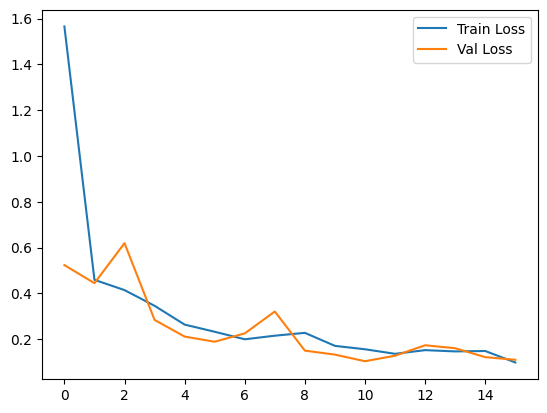

<Figure size 640x480 with 0 Axes>

In [30]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Plotting Accuracy 


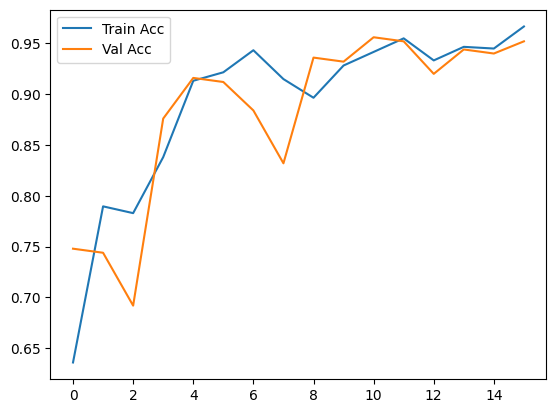

<Figure size 640x480 with 0 Axes>

In [31]:
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Saving the File as .h5 Type


In [32]:
from tensorflow.keras.models import load_model 
model.save('model_vgg16.h5')

#Predictions

In [33]:
y_pred=model.predict(test_set)


C:\Users\Gen. Shakefire\anaconda3\envs\Landmine2024\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 123s 24s/step


In [34]:
y_pred

array([[6.99659050e-01, 3.00340980e-01],
       [9.33824182e-01, 6.61758110e-02],
       [1.12566561e-01, 8.87433410e-01],
       [9.38169837e-01, 6.18301518e-02],
       [4.79646167e-03, 9.95203495e-01],
       [9.98071730e-01, 1.92824274e-03],
       [5.52875281e-04, 9.99447167e-01],
       [9.96803045e-01, 3.19698220e-03],
       [1.35379229e-02, 9.86462057e-01],
       [1.78661547e-03, 9.98213410e-01],
       [9.63187516e-01, 3.68124433e-02],
       [8.88578355e-01, 1.11421630e-01],
       [9.89676058e-01, 1.03239538e-02],
       [8.67847621e-01, 1.32152393e-01],
       [1.57677045e-03, 9.98423219e-01],
       [2.58244164e-02, 9.74175513e-01],
       [9.68737304e-01, 3.12627628e-02],
       [2.86296606e-02, 9.71370399e-01],
       [1.40891653e-02, 9.85910892e-01],
       [9.36797023e-01, 6.32029846e-02],
       [5.07925462e-04, 9.99492049e-01],
       [9.93939042e-01, 6.06100028e-03],
       [8.66253495e-01, 1.33746505e-01],
       [1.54769160e-02, 9.84523058e-01],
       [4.774000

In [35]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [36]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [37]:
from tensorflow.keras.preprocessing import image


Losses and Accuracy 


In [73]:
 from sklearn.metrics import accuracy_score
 from sklearn.metrics import f1_score
 from sklearn.metrics import roc_auc_score


In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
#f1_score(test_y,y_pred)

In [76]:
accuracy_score(test_y, y_pred)

0.5307692307692308

In [77]:
#roc_auc_score(test_y,y_pred)

In [78]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        55
           1       0.59      0.63      0.61        75

    accuracy                           0.53       130
   macro avg       0.51      0.51      0.51       130
weighted avg       0.53      0.53      0.53       130



In [79]:
print(confusion_matrix(y_pred,test_y))

[[22 33]
 [28 47]]


In [197]:
# Predict on a new image
model=load_model('model_vgg16.h5')
img_path = r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16\test\non-threat\FlightAltitude__6.1m_TemperatureInCenter__36°C.jpg"
img=image.load_img(img_path,target_size=(224,224))
img = np.expand_dims(img, axis=0)
img = img / 255.0
prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(training_set.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


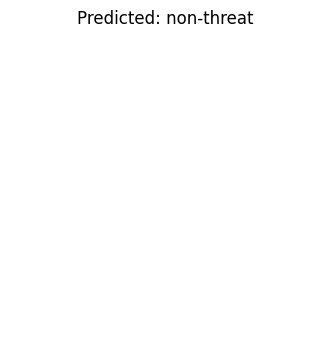

In [198]:
# Display the prediction
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()

In [199]:
#model uses RGB 

In [200]:
#finetune results viewing if else........

In [201]:
# Predict on a new image
img_path = r"C:\Users\Gen. Shakefire\Desktop\LANDMINE USING CNN VGG16\test\threat\FlightAltitude__2.0m_TemperatureInCenter__29°C (2).jpg"
img=image.load_img(img_path,target_size=(224,224))
img = np.expand_dims(img, axis=0)
img = img / 255.0
prediction = model.predict(img)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(training_set.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


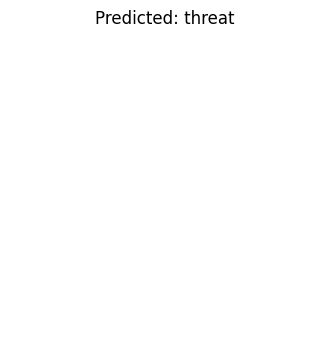

In [202]:
# Display the prediction
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()